In [70]:
import numpy as np
import matplotlib.pyplot as plt
import os
import globals as gl
import xarray as xr

plt.style.use('default')

experiment = 'EFC_learningEMG'

npz = np.load(os.path.join(gl.baseDir, experiment, 'coherence', 'day1', 'subj100', 'mscohere.npz'))
f = npz['f']

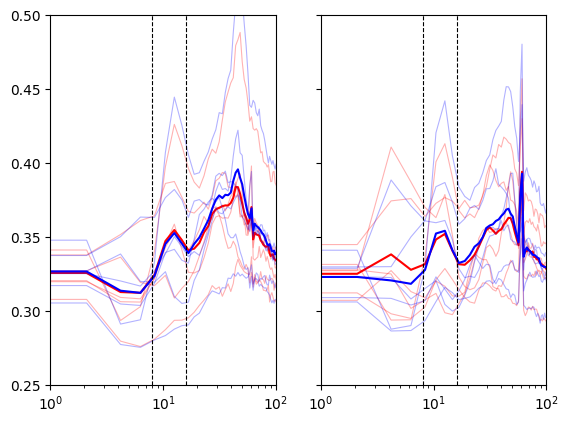

In [116]:
da = xr.open_dataarray(os.path.join(gl.baseDir, experiment, 'coherence', 'mscohere.h5'), engine="h5netcdf")
trained = da.sel(chord='trained')
untrained = da.sel(chord='untrained')
err_trained = da.sel(chord='trained').std(axis=-1) / np.sqrt(da.shape[-1])
err_untrained = da.sel(chord='untrained').std(axis=-1) / np.sqrt(da.shape[-1])
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
for i in range(2):
    ax = axs[i]
    ax.plot(f, trained[i].mean(axis=-1), color='r')
    ax.plot(f, trained[i], color='r', alpha=.3, lw=.8)
    # ax.fill_between(f, trained[i] - err_trained[i], trained[i] + err_trained[i], color='r', alpha=0.1, lw=0)
    ax.plot(f, untrained[i].mean(axis=-1), color='b')
    ax.plot(f, untrained[i], color='b', alpha=.3, lw=.8)
    # ax.fill_between(f, untrained[i] - err_untrained[i], untrained[i] + err_untrained[i], color='b', alpha=0.1, lw=0)
    ax.axvline(8, color='k', lw=.8, ls='--')
    ax.axvline(16, color='k', lw=.8, ls='--')
    # ax.axvline(25, color='k', lw=.8, ls='--')
    ax.set_xscale('log')
    ax.set_ylim(.25, .5)
    ax.set_xlim(1, 100)

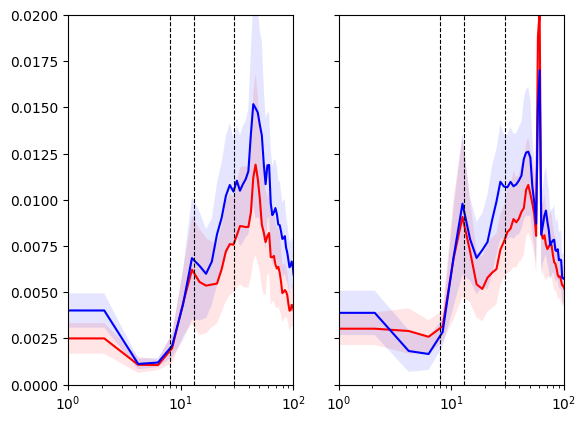

In [131]:
D = np.load(os.path.join(gl.baseDir, experiment, 'coherence', 'Dissimilarity.z_coh.npy'))
trained = D[:, :, :, :4, :4].mean(axis=(1, 3, 4))
untrained = D[:, :, :, 4:, 4:].mean(axis=(1, 3, 4))
err_trained = D[:, :, :, :4, :4].mean(axis=(3, 4)).std(axis=1) / np.sqrt(D.shape[1])
err_untrained = D[:, :, :, 4:, 4:].mean(axis=(3, 4)).std(axis=1) / np.sqrt(D.shape[1])

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

for i in range(2):
    ax = axs[i]
    ax.plot(f, trained[i], color='red')
    ax.fill_between(f, trained[i] - err_trained[i], trained[i] + err_trained[i], color='r', alpha=0.1, lw=0)
    ax.plot(f, untrained[i], color='blue' )
    ax.fill_between(f, untrained[i] - err_untrained[i], untrained[i] + err_untrained[i], color='b', alpha=0.1, lw=0)
    ax.axvline(8, color='k', lw=.8, ls='--')
    ax.axvline(13, color='k', lw=.8, ls='--')
    ax.axvline(30, color='k', lw=.8, ls='--')
    ax.set_xscale('log')
    ax.set_ylim(0, .02)
    ax.set_xlim(1, 100)

plt.show()

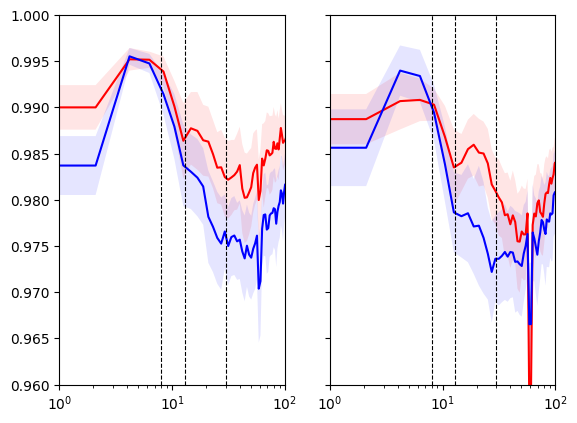

In [136]:
C = np.load(os.path.join(gl.baseDir, experiment, 'coherence', 'Cosine.z_coh.npy'))
trained = C[:, :, :, :4, :4].mean(axis=(1, 3, 4))
untrained = C[:, :, :, 4:, 4:].mean(axis=(1, 3, 4))
err_trained = C[:, :, :, :4, :4].mean(axis=(3, 4)).std(axis=1) / np.sqrt(C.shape[1])
err_untrained = C[:, :, :, 4:, 4:].mean(axis=(3, 4)).std(axis=1) / np.sqrt(C.shape[1])

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

for i in range(2):
    ax = axs[i]
    ax.plot(f, trained[i], color='red')
    ax.fill_between(f, trained[i] - err_trained[i], trained[i] + err_trained[i], color='r', alpha=0.1, lw=0)
    ax.plot(f, untrained[i], color='blue' )
    ax.fill_between(f, untrained[i] - err_untrained[i], untrained[i] + err_untrained[i], color='b', alpha=0.1, lw=0)
    ax.axvline(8, color='k', lw=.8, ls='--')
    ax.axvline(13, color='k', lw=.8, ls='--')
    ax.axvline(30, color='k', lw=.8, ls='--')
    ax.set_xscale('log')
    ax.set_ylim(.96, 1)
    ax.set_xlim(1, 100)

plt.show()

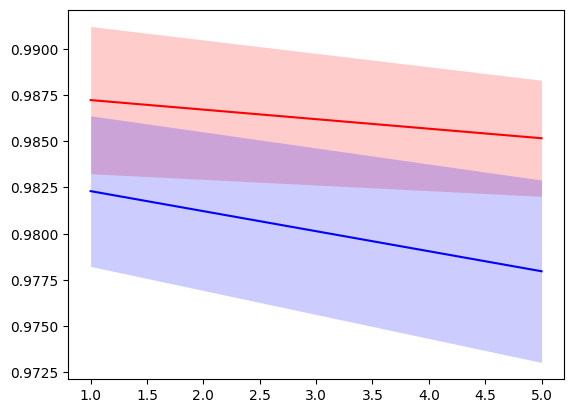

In [159]:
trained_beta = C[:, :, (f > 13) & (f < 20), :4, :4].mean(axis=(1, 2, 3, 4))
untrained_beta = C[:, :, (f > 13) & (f < 20), 4:, 4:].mean(axis=(1, 2, 3, 4))
err_trained_beta = C[:, :, (f > 13) & (f < 20), :4, :4].mean(axis=(2, 3, 4)).std(axis=1) / np.sqrt(C.shape[1])
err_untrained_beta = C[:, :, (f > 13) & (f < 20), 4:, 4:].mean(axis=(2, 3, 4)).std(axis=1) / np.sqrt(C.shape[1])

fig, ax = plt.subplots()
ax.plot([1, 5], trained_beta, color='r')
ax.fill_between([1, 5], trained_beta - err_trained_beta, trained_beta + err_trained_beta, color='r', alpha=.2, lw=0)
ax.plot([1, 5], untrained_beta, color='b')
ax.fill_between([1, 5], untrained_beta - err_untrained_beta, untrained_beta + err_untrained_beta, color='b', alpha=.2, lw=0)

plt.show()